## Análise 01: Volcano Eruptions

Uma emocionante análise de erupções de vulcões.

Esta análise tem intuito de desvendar algumas curiosidades sobre estes vulcões que provavelmente entraram em erupção,

porém a análise principal é sobre os 3  tipos principais de vulcão, que características são mais determinantes de cada um,

detalhe que os 3 tipos mais frequentes são: vulcão-escudo, cones de escória, estratovulcões, porém deste dataset ainda iremos descobrir. :)

### Sobre o dataset:

Este conjunto de dados contem aproximadamente 1400 vulcões que entraram em erupção desde o período Holoceno (aproximadamente 10.000 anos atrás).

O dataset contem 13 colunas, e elas são:

- Volcano Number: número cadastrado do vulcão, podemos dizer que é o id;
- Volcano Name: nome do vulcão;
- Country: país onde o vulcão está;
- Primary Volcano Type: tipo primário do vulcão, os 3 tipos mais comun são vulcão-escudo, cones de escória, estratovulcões. Saiba mais sobre eles aqui. (obs: não sabia que vulcões eram tão legais)
- Activity Evidence: evidências que o vulcão esteve em atividade;
- Last Know Eruption: ano da última erupção que se tem conhecimento, detalhe que CE significa Common Era, o ano 1 em CE é o mesmo que o ano 1 em DC (Depois de Cristo), e BCE (Before Common Era)  corresponde ao AC (Antes de Cristo);
- Region: região onde o vulcão se encontra;
- Subregion: sub-região onde o vulcão se encontra;
- Latitude: latitude do vulcão;
- Longitude: longitude do vulcão;
- Elevation (m): elevação em metros do vulcão;
- Dominant Rock Type: tipo de rocha dominante no vulcão;
- Tectonic Setting: cenário tectônico;

## As perguntas que iremos responder são:

1 - Quais os 5 países com mais vulcões?

2 - Qual a região com mais vulcões e a que tem menos?

3 - Qual o tipo de vulcão que aparece mais vezes?

4 - Quais os tipos de rochas mais predominantes?

5 - Qual o maior e o menor vulcão?

#### E por fim a análise final:

Queremos saber quais fatores influenciam os vulcões a serem classificados nos 3 principais tipos

6 - Quais são os 3 principais tipos de vulcão deste dataset?

7 - A elevação influencia ser qual tipo de vulcão?

8 - O país influencia ser qual tipo de vulcão?

9 - O tipo de rocha influencia ser qual tipo de vulcão?

In [76]:
# Importando bibliotecas
# Vamos importar as libs que pretendemos usar ao longo do projeto
import pandas as pd
import math
import numpy as np
import random
import matplotlib.pyplot as plt

%matplotlib inline

# Lendo arquivo de dados de vulcões
df = pd.read_csv('Volcano-Eruptions.csv')

# Testando se a importação ocorreu bem
df.head()

,Volcano Number,Volcano Name,Country,Primary Volcano Type,Activity Evidence,Last Known Eruption,Region,Subregion,Latitude,Longitude,Elevation (m),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Maar(s),Eruption Dated,8300 BCE,Mediterranean and Western Asia,Western Europe,50.170,6.85,600,Foidite,Rift zone / Continental crust (>25 km)
1,210020,Chaine des Puys,France,Lava dome(s),Eruption Dated,4040 BCE,Mediterranean and Western Asia,Western Europe,45.775,2.97,1464,Basalt / Picro-Basalt,Rift zone / Continental crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Pyroclastic cone(s),Evidence Credible,Unknown,Mediterranean and Western Asia,Western Europe,42.170,2.53,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Pyroclastic cone(s),Eruption Dated,3600 BCE,Mediterranean and Western Asia,Western Europe,38.870,-4.02,1117,Basalt / Picro-Basalt,Intraplate / Continental crust (>25 km)
4,211001,Larderello,Italy,Explosion crater(s),Eruption Observed,1282 CE,Mediterranean and Western Asia,Italy,43.250,10.87,500,No Data (checked),Subduction zone / Continental crust (>25 km)


## Limpeza de dados

Nesta etapa verificar quais colunas apresentam dados faltantes e decidir o que fazer fazer com elas

Usaremos agora um método que identifica quais colunas possuem dados vazios, e quantos são:

In [50]:
df.isnull().sum()

Volcano Number           0
Volcano Name             0
Country                  0
Primary Volcano Type     0
Activity Evidence        0
Last Known Eruption      0
Region                   0
Subregion                0
Latitude                 0
Longitude                0
Elevation (m)            0
Dominant Rock Type      14
Tectonic Setting         5
dtype: int64

## Os dados faltantes

As colunas com dados vazios são:

- Dominant Rock Type
- Tectonic Setting

Vamos verificar o tipo dos dados, pois com essa informação poderemos tomar melhor nossa decisão

In [51]:
rocktype     = df['Dominant Rock Type'].dtype
tectonictype = df['Tectonic Setting'].dtype

print("O tipo da coluna 'Dominant Rock Type' é {} e o tipo de Tectonic Setting é {}".format(rocktype,tectonictype))

O tipo da coluna 'Dominant Rock Type' é object e o tipo de Tectonic Setting é object


## Definindo o que faremos:

Aqui cabe uma importante observação, colunas com o tipo 'object' no pandas são equivalentes a strings, ou seja, texto

Como strings são dados importantes, meu julgamento é que devemos remover estas linhas faltantes para não comprometer a integridade dos dados

Acho errado 'inventarmos' um valor para preencher estas linhas apenas para usar o dataset completo

Porém caso fosse uma coluna numérica, poderiamos até tirar a média e completar os valores faltantes com ela, mas neste caso específico minha decisão é de remover estas colunas

In [52]:
# Removando da coluna Dominant
df.dropna(subset=['Dominant Rock Type'], inplace=True)

# Removendo da coluna Tectonic Setting
df.dropna(subset=['Tectonic Setting'], inplace=True)

## Funções helper:

Aqui vamos colocar as funções que usaremos durante a análise, isso organiza e não polui a mesma

In [53]:
# Função que faz o pie chart (gráfico de pizza) mostrar os valores e a porcentagem
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.0f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

## Checando as mudanças:

Vamos agora refazer o teste de células nulas

In [54]:
df.isnull().sum()

Volcano Number          0
Volcano Name            0
Country                 0
Primary Volcano Type    0
Activity Evidence       0
Last Known Eruption     0
Region                  0
Subregion               0
Latitude                0
Longitude               0
Elevation (m)           0
Dominant Rock Type      0
Tectonic Setting        0
dtype: int64

## Resumo limpeza de dados:

Verficamos que duas colunas possuiam dados nulos, elas eram:

- Dominant Rock Type
- Tectonic Setting

Utilizamos o metodo dropna para eliminar as mesmas, e agora podemos seguir com nosso dataset pronto para utilização

## Prosseguindo:

Como visto não há mais celulas nulas, podemos prosseguir a próxima etapa

## Iniciando a responder as perguntas

Agora vamos responder as perguntas destinadas a esta análise

### 1 - Quais os 5 países com mais vulcões?

In [55]:
'''
    Vamos separar em partes o que fizemos aqui
    
    1 - Com o método groupby agrupamos o dataset pelo país
    2 - Com isso escolhemos a coluna 'Volcano Number' para usar o count e ver quantos elementos estão presentes em cada país,
        ou seja, quantos vulcões existem
    3 - Com o total em mãos utilizamos o método sort_values com a ordenação descendente para mostrar os países com mais 
        ocorrências
    4 - Por fim o método head com limite de 5, para mostrar os 5 países com mais vulcões e chegar na nossa resposta
''' 
topCountries = df.groupby(['Country'])['Volcano Number'].count().sort_values(ascending=False).head(5)

topCountries

Country
United States    167
Russia           144
Indonesia        127
Japan            105
Chile             73
Name: Volcano Number, dtype: int64

## Ajuste de dados:

Bom, já temos a resposta, porém para apresentar a mesma de uma forma mais legível vou fazer 
algumas modificações abaixo

In [56]:
# Primeiramente transformar a Series que temos em um DataFrame
dfCountries = topCountries.to_frame().reset_index()

# Agora vamos renomear a coluna para fazer mais sentido
dfCountries = dfCountries.rename(columns={'Volcano Number': 'Volcanoes Count'})

# Aqui está o nosso Dataset de contagem de vulcões, mais organizado e fácil de trabalhar
dfCountries

,Country,Volcanoes Count
0,United States,167
1,Russia,144
2,Indonesia,127
3,Japan,105
4,Chile,73


In [57]:
# Vamos agora responder a pergunta
country = dfCountries['Country']
count   = dfCountries['Volcanoes Count']

# Adicionando um print mostrando quais são os 5 países com mais vulcões, em ordem
print(
      "Os 5 países com mais vulcões são {}, {}, {}, {} e {} respectivamente"
      .format(country[0],country[1],country[2],country[3],country[4])
     )

Os 5 países com mais vulcões são United States, Russia, Indonesia, Japan e Chile respectivamente


## Representação gráfica:

Vamos representar por meio de gráfico os 5 países e mostrando a contagem de vulcões

obs: É uma parte opicional, porém para pessoas leigas em programação torna a visualização de dados agrádavel e também interessante

([<matplotlib.patches.Wedge at 0x26702013b38>,
 [Text(0.790448,0.90288,'United States'),
  Text(-0.838629,0.71183,'Russia'),
  Text(-0.856506,-0.690216,'Indonesia'),
  Text(0.315284,-1.05385,'Japan'),
  Text(1.02464,-0.400134,'Chile')],
 [Text(0.461095,0.52668,'27%  (167)'),
  Text(-0.457434,0.388271,'23%  (144)'),
  Text(-0.467185,-0.376481,'21%  (127)'),
  Text(0.171973,-0.574826,'17%  (105)'),
  Text(0.558896,-0.218255,'12%  (73)')])

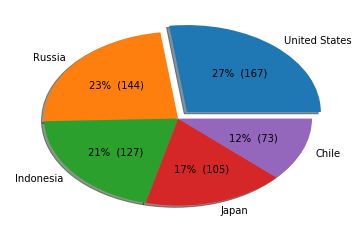

In [58]:
# Imprimindo o gráfico com o matplotlib

# Primeiramente vamos setar as labels e os valores
labels = country[0],country[1],country[2],country[3],country[4]
values = [count[0],count[1],count[2],count[3],count[4]]

# Vamos dar uma pequena enfase na fatia mais populada
explode = (0.1, 0, 0, 0, 0)

plt.pie(values, explode=explode, labels=labels, autopct=make_autopct(values), shadow=True)

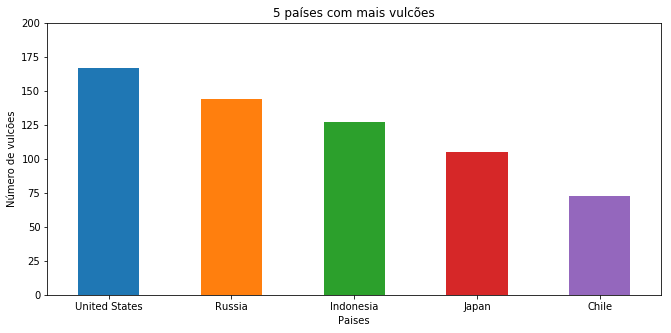

In [59]:
# Criando o gráfico pela contagem de vulcões, tipo barra
ax = dfCountries['Volcanoes Count'].plot(kind='bar', figsize=(11,5))

# Setando as labels dos países
ax.set_xticklabels([country[0],country[1],country[2],country[3],country[4]], rotation='horizontal')
# Setando o limite de Y
ax.set_ylim([0, 200])
# Setando a label de Y
ax.set_ylabel('Número de vulcões')
# Setando a label de X
ax.set_xlabel('Paises')
# Setando o título do gráfico
ax.set_title('5 países com mais vulcões')

plt.show()

## 2 - Qual a região com mais vulcões e a que tem menos?

Vamos agora para a segunda pergunta, qual a região com mais e a com menos vulcões

Para isso vamos agrupar o dataset por regiões

In [60]:
# Agrupando dataset por region
dfRegion = df.groupby(['Region'])['Volcano Number'].count()

# Transformar a Series num DataFrame
dfRegion = dfRegion.to_frame().reset_index()

# Mudando o nome da coluna
dfRegion = dfRegion.rename(columns={'Volcano Number': 'Count'})

# Primeiramente usamos o metodo loc para localizar o que queremos, entao com idxmax procuramos a linha com mais ocorrências
maisVulcoes  = dfRegion.loc[dfRegion['Count'].idxmax()]

# Agora a mesma coisa só que com idxmin para a região com menor número
menosVulcoes = dfRegion.loc[dfRegion['Count'].idxmin()]

# Agora vamos mostrar o resultado
print("A região que possui mais vulcões é {}, com {}, já a que tem menos é a {}, com {}."
      .format(
          maisVulcoes['Region'],
          maisVulcoes['Count'],
          menosVulcoes['Region'],
          menosVulcoes['Count']
      )
     )

A região que possui mais vulcões é South America, com 189, já a que tem menos é a West Indies, com 16.


## Representação gráfica:

Certo, até agora descobrimos que a região com mais vulcões é a América do Sul e a com menos são as Índias Ocidentais,

Vamos agora reproduzir de forma gráfica, para verificar também as demais regiões

TypeError: 'AxesSubplot' object is not subscriptable

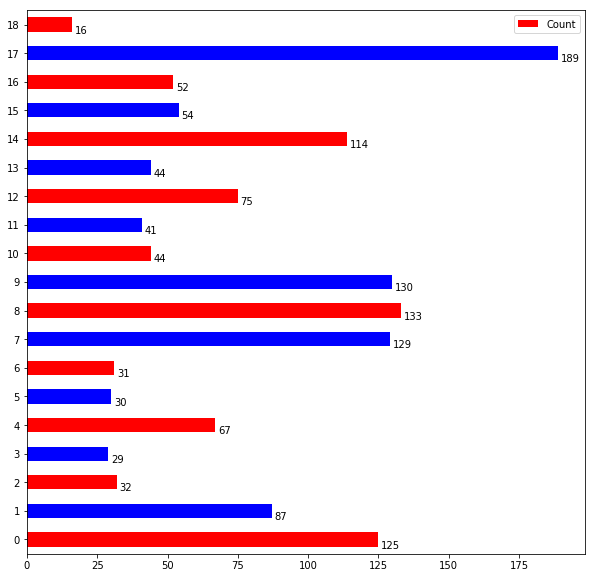

In [81]:
ax = dfRegion.plot(kind='barh', color=[['red','blue']], figsize=(10,10))

for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.05))

plt.title('QUANTIDADE DE OCORRÊNCIAS AGRUPADAS POR TIPO \n Total: ' + str(ax['Count']) + ' ocorrências')
plt.ylabel('TIPO DE OCORRÊNCIA')
plt.xlabel('QUANTIDADE DE OCORRÊNCIA')
plt.show()
